# Titanic data

## Preprocessing data

In [95]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

import warnings
warnings.filterwarnings('ignore') 

In [115]:
# reading train data
df_train = pd.read_csv('train.csv')
# reading test data
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [97]:
# checking the dimension of the data set
df_train.shape

(891, 12)

In [98]:
# checking names of the columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data dictionary

1. The feature "survival" indicates if the passanger survived. (Keys:	0 = No, 1 = Yes)
2. The feature "pclass" denotes the ticket class (Keys: 1 = 1st, 2 = 2nd, 3 = 3rd)
3. The feature "sex" denotes the sex of the passanger/	
4. The feature "age" denotes age in years 	
5. The feature "sibsp" denotes the number of siblings / spouses aboard the Titanic 	
6. The feature "parch" denotes the number of parents / children aboard the Titanic 	
7. The feature "ticket" indicates the ticket number 	
8. The feature "fare" denotes passenger fare 	
9. The feature "cabin" denotes cabin number 	
10. The feature "embarked" denotes the port of embarkation (keys:C = Cherbourg, Q = Queenstown, S = Southampton)

## Checking missing values 

In [99]:
# checking completness of the data (if NA occurs in dataset)
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in the column "Age", 687 missing values in the column "Cabin" and two missing values in the column "Embarked".

We choose the tagret feature ('Survived') and three explanatory variables 'Pclass', 'Sex', 'Embarked' .

In [100]:
# We remove NAs from the column Embarked' and overwrite the existing data frame
df_train = df_train.loc[df_train.Embarked.notna(),['Survived','Pclass','Sex','Embarked']]

In [101]:
# Check if the rows have been removed
df_train.shape

(889, 4)

In [102]:
print(df_train)

     Survived  Pclass     Sex Embarked
0           0       3    male        S
1           1       1  female        C
2           1       3  female        S
3           1       1  female        S
4           0       3    male        S
..        ...     ...     ...      ...
886         0       2    male        S
887         1       1  female        S
888         0       3  female        S
889         1       1    male        C
890         0       3    male        Q

[889 rows x 4 columns]


In [103]:
X_pclass = df_train.loc[:,['Pclass']]
y = df_train.Survived

In [104]:
X_pclass.shape

(889, 1)

In [105]:
y.shape

(889,)

In [117]:
# We remove NAs from the column Embarked' and overwrite the existing data frame
df_test = df_test.loc[df_test.Embarked.notna(),['Pclass','Sex','Embarked']]

## Encoding cateregorical variables 

Now we prepare data for the logistic regression. We begin with encoding categorical variables

In [106]:
# encoding "sex" variable
sex = pd.get_dummies(df_train["Sex"],drop_first=True)

In [107]:
# encoding "embarked" variable
embarked = pd.get_dummies(df_train["Embarked"],drop_first=True)


In [108]:
# encoding "pclass" variable
pclass = pd.get_dummies(df_train["Pclass"],drop_first=True)

In [109]:
# concatenating encoded data
train_data = pd.concat([df_train,pclass,sex,embarked],axis=1)

In [110]:
# Checking the data
train_data

,Survived,Pclass,Sex,Embarked,2,3,male,Q,S
0,0,3,male,S,0,1,1,0,1
1,1,1,female,C,0,0,0,0,0
2,1,3,female,S,0,1,0,0,1
3,1,1,female,S,0,0,0,0,1
4,0,3,male,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,S,1,0,1,0,1
887,1,1,female,S,0,0,0,0,1
888,0,3,female,S,0,1,0,0,1
889,1,1,male,C,0,0,1,0,0


In [111]:
# Removing uncoded data
train_data.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [112]:
# Checking the data again
train_data

,Survived,2,3,male,Q,S
0,0,0,1,1,0,1
1,1,0,0,0,0,0
2,1,0,1,0,0,1
3,1,0,0,0,0,1
4,0,0,1,1,0,1
...,...,...,...,...,...,...
886,0,1,0,1,0,1
887,1,0,0,0,0,1
888,0,0,1,0,0,1
889,1,0,0,1,0,0


In [125]:
# X_train will contain all the features 
X = train_data.drop("Survived",axis=1)
#  y_test will contain the target variable 
y = train_data["Survived"]

## Vizualization 

We begin with the ploting the barplot of the feature "passenger class".

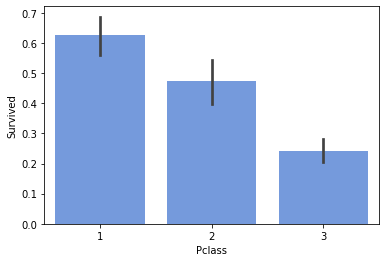

In [38]:
sns.barplot('Pclass', 'Survived', data=df_train, color="cornflowerblue")
plt.show()

The percentage of passangers who survived in the first class was two times bigger than passengers from the third class.

Now we analize the place of embarkation.

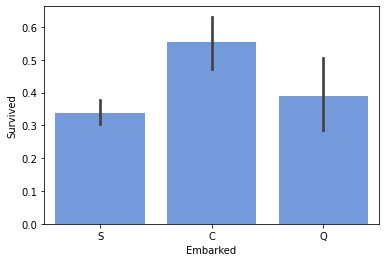

In [39]:
sns.barplot('Embarked', 'Survived', data=df_train, color="cornflowerblue")
plt.show()

The highest procentage of survived passangers was embarked in Cherbourg, the lowest in Southampton.

Finally we analyze the procentage of survived passengers with respect to sex.

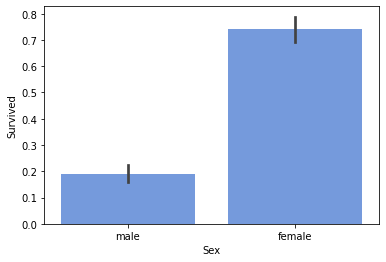

In [40]:
sns.barplot('Sex', 'Survived', data=df_train, color="cornflowerblue")
plt.show()

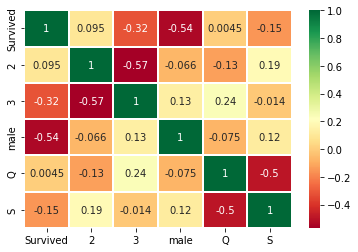

In [41]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
plt.show()

Conclusions:

    + negative correlations between features "Survived" and "Male"
    + negative correlations between features "Survived" and "2nd class"
    + correlation between survived and second class is close to zero.
    + correlation between between embarked in Queenstown and survived is close to zero.

## Logistic regression

We begin with dividing the set into train and test set

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [130]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
# Applying logistic regression to training data
logmodel.fit(X_train,y_train)

LogisticRegression()

In [131]:
# Prediction for test data
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       105
           1       0.75      0.79      0.77        73

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.81      0.81      0.81       178



Accurancy is 80%, recall 81%, f1 - 80%

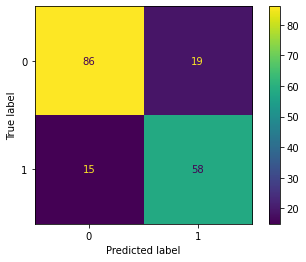

In [138]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


True positive: 58  Correctly predicted negative
True negative: 86  Correctly predicted positive 
False positive: 15 Uncorrectly predicted negative 
False negative: 19 Uncorrectly predicted positive